In [1]:
# Loading and preprocessing data
import pandas as pd
import keras.utils.np_utils as kutils

train = pd.read_csv("train.csv").values
test  = pd.read_csv("test.csv").values

trainX = train[:, 1:].reshape(train.shape[0], 1, 28, 28)
trainX = trainX.astype(float)
trainX /= 255.0

trainY = kutils.to_categorical(train[:, 0])

testX = test.reshape(test.shape[0], 1, 28, 28)
testX = testX.astype(float)
testX /= 255.0

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 4007)


In [2]:
# Defining the model and its configuration
import keras.layers.core as core
import keras.layers.convolutional as conv
import keras.models as models
from keras.callbacks import History

batch_size = 128
nb_classes = trainY.shape[1]
nb_epoch = 10
history = History()

cnn = models.Sequential()
cnn.add(conv.Convolution2D(8, 3, 3, border_mode='same', input_shape=(1, 28, 28), activation='relu'))
cnn.add(conv.Convolution2D(16, 3, 3, border_mode='same', activation='relu'))
cnn.add(conv.Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
cnn.add(conv.MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='valid'))
cnn.add(core.Flatten())
cnn.add(core.Dense(512, activation="relu"))
cnn.add(core.Dense(nb_classes, activation="softmax"))
cnn.summary()
cnn.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

# Training the model
model = cnn.fit(trainX, trainY, batch_size=batch_size, nb_epoch=nb_epoch, validation_split=0.2, verbose=1, callbacks=[history])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 8, 28, 28)     80          convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 16, 28, 28)    1168        convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 32, 28, 28)    4640        convolution2d_2[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 14, 14)    0           convolution2d_3[0][0]            
___________________________________________________________________________________________

In [3]:
# Getting predictions for test data from the trained model
import numpy as np

yPred = cnn.predict_classes(testX)
np.savetxt('mnist_test.csv', np.c_[range(1,len(yPred)+1),yPred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

27968/28000 [============================>.] - ETA: 0s

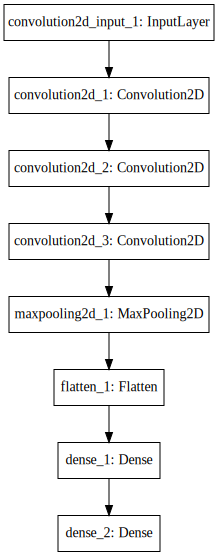

In [4]:
# Displaying model flow
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(cnn).create(prog='dot', format='svg'))

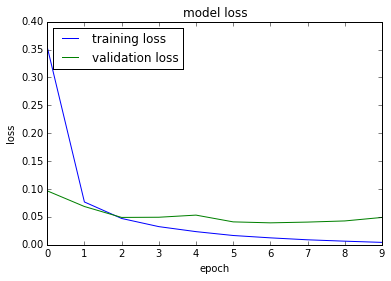

In [5]:
# Plotting training loss vs validation loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

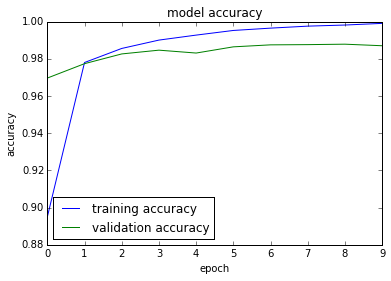

In [7]:
# Plotting training accuracy vs validation accuracy
%matplotlib inline
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')
plt.show()

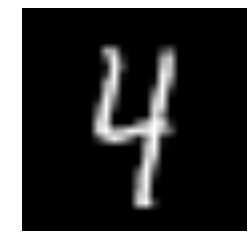

In [8]:
# Visualizing random test image
import random

j = random.randrange(0, testX.shape[0])
%matplotlib inline
img = np.asarray(testX[j][0])
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.show()

/home/cuda/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/cuda/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<module 'matplotlib.pyplot' from '/home/cuda/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

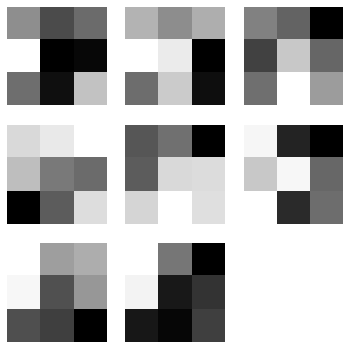

In [9]:
# Visualizing weights of first convolutional layer
from lasagne import layers
from nolearn.lasagne import visualize

%matplotlib inline
visualize.plot_conv_weights(cnn.layers[0])

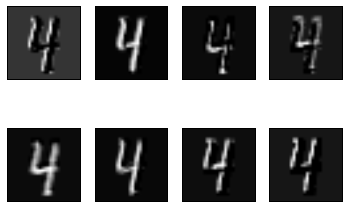

In [10]:
# Visualizing activations of first convolutional layer
from keras import backend as K
import matplotlib.gridspec as gridspec

get_conv1_actv = K.function([cnn.layers[0].input], cnn.layers[0].output)
conv1_actv = get_conv1_actv([testX])
gs = gridspec.GridSpec(2, 4)
i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(conv1_actv[j][i], cmap='Greys_r')
    i += 1
    ax.set_xticks([])
    ax.set_yticks([])

<module 'matplotlib.pyplot' from '/home/cuda/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

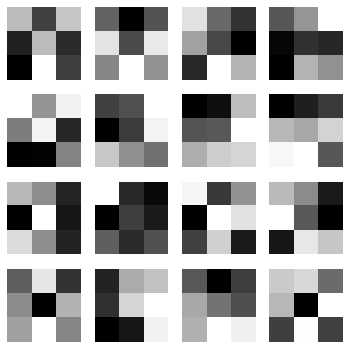

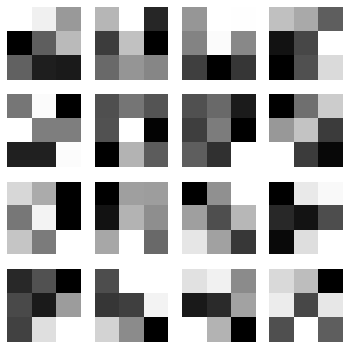

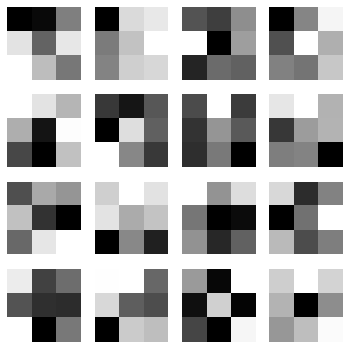

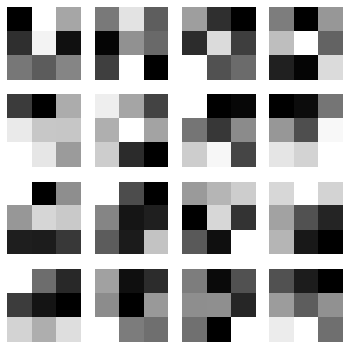

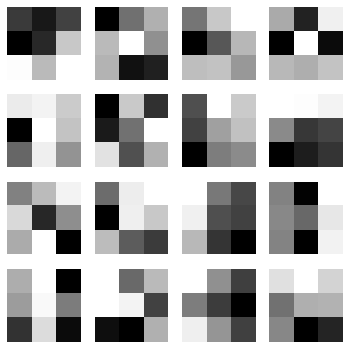

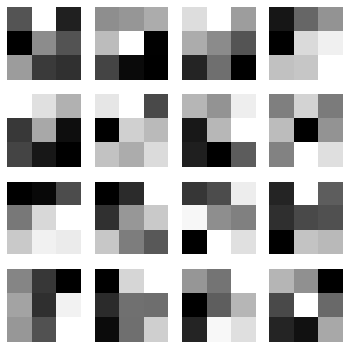

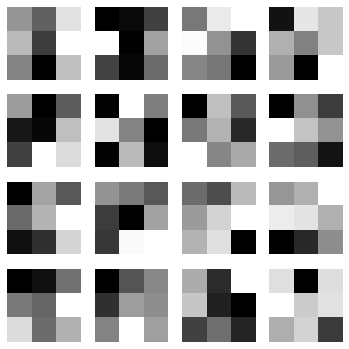

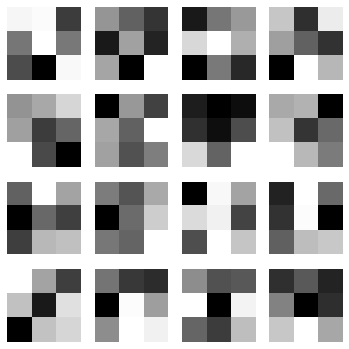

In [11]:
# Visualizing weights of second convolutional layer
visualize.plot_conv_weights(cnn.layers[1])

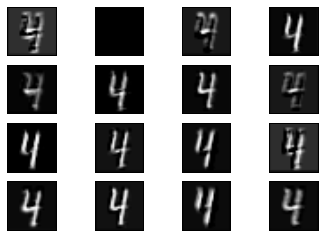

In [12]:
# Visualizing activations of second convolutional layer
get_conv2_actv = K.function([cnn.layers[0].input], cnn.layers[1].output)
conv2_actv = get_conv2_actv([testX])
gs = gridspec.GridSpec(4, 4)
i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(conv2_actv[j][i], cmap='Greys_r')
    i += 1
    ax.set_xticks([])
    ax.set_yticks([])

<module 'matplotlib.pyplot' from '/home/cuda/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

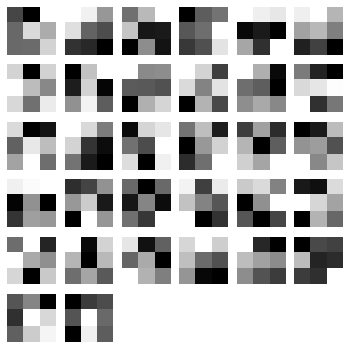

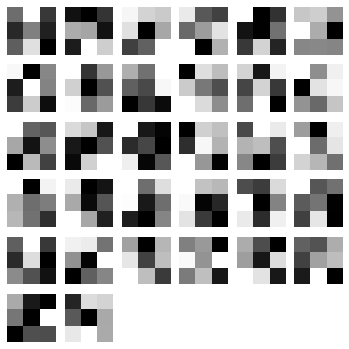

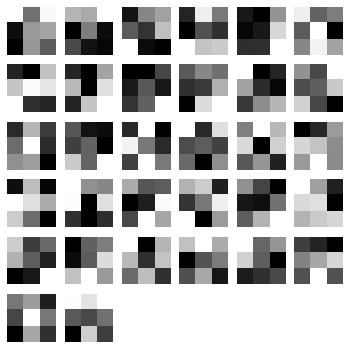

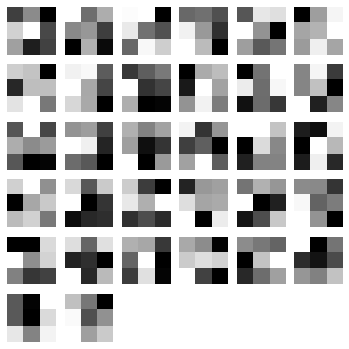

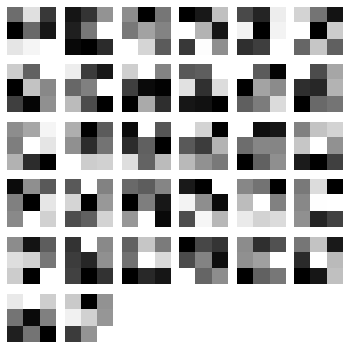

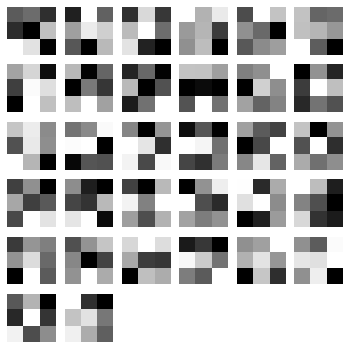

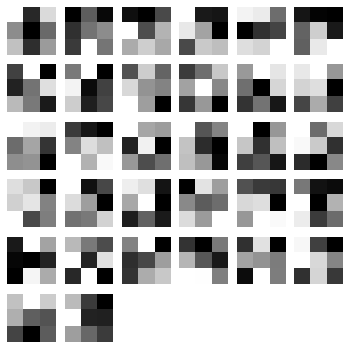

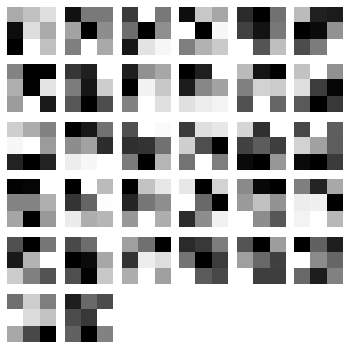

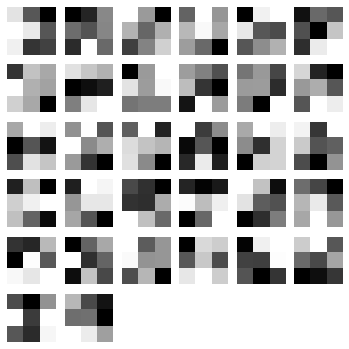

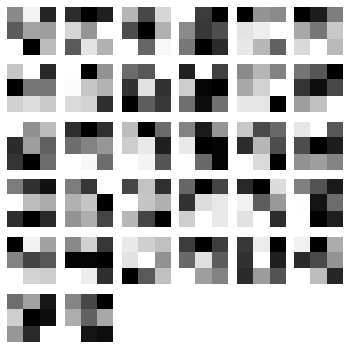

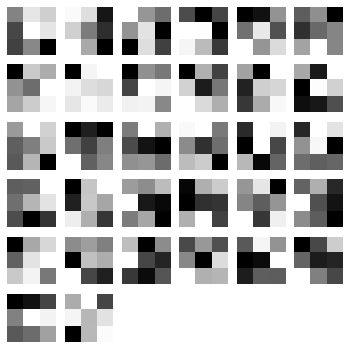

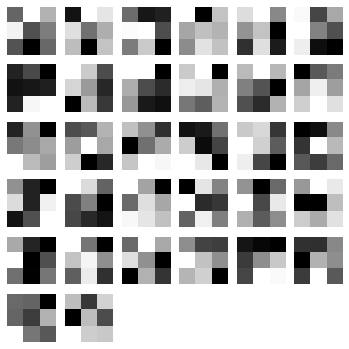

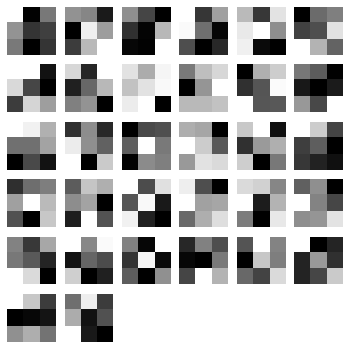

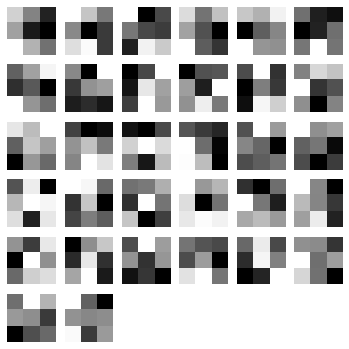

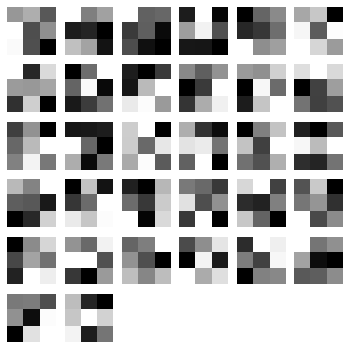

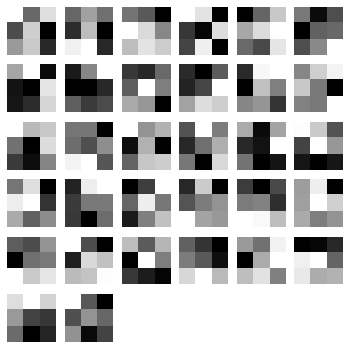

In [13]:
# Visualizing weights of third convolutional layer
visualize.plot_conv_weights(cnn.layers[2])

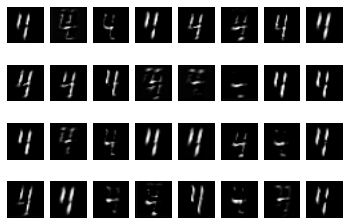

In [14]:
# Visualizing activations of third convolutional layer
get_conv3_actv = K.function([cnn.layers[0].input], cnn.layers[2].output)
conv3_actv = get_conv3_actv([testX])
gs = gridspec.GridSpec(4, 8)
i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(conv3_actv[j][i], cmap='Greys_r')
    i += 1
    ax.set_xticks([])
    ax.set_yticks([])

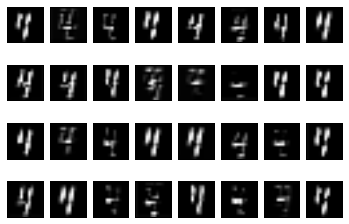

In [15]:
# Visualizing outputs of max-pooling layer
get_max_pool = K.function([cnn.layers[0].input], cnn.layers[3].output)
max_pool = get_max_pool([testX])
gs = gridspec.GridSpec(4, 8)
i = 0

for g in gs:
    ax = plt.subplot(g)
    ax.imshow(max_pool[j][i], cmap='Greys_r')
    i += 1
    ax.set_xticks([])
    ax.set_yticks([])

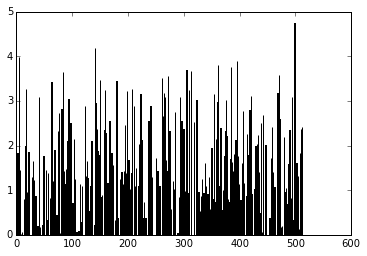

In [16]:
# Visualizing dense layer
f_dense = K.function([cnn.layers[0].input, K.learning_phase()], cnn.layers[5].output)
pred = f_dense([testX, 0])
N = pred.shape[1]
plt.bar(range(N), pred[j].ravel())
plt.show()

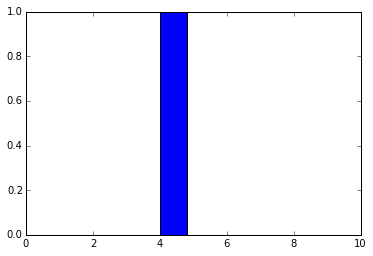

In [17]:
# Visualizing output layer
f_output = K.function([cnn.layers[0].input, K.learning_phase()], cnn.layers[6].output)
pred = f_output([testX, 0])
N = pred.shape[1]
plt.bar(range(N), pred[j].ravel())
plt.show()